# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline                 

# TODO: fill this in based on where you saved the training and testing data
training_file = 'lab 2 data/train.p'
testing_file = 'lab 2 data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
print('Extracted training data..')
X_test, y_test = test['features'], test['labels']
print('Extracted test data..')

is_data_read = True

Extracted training data..
Extracted test data..


In [2]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# We'll generate an animation with matplotlib and moviepy.
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


X_r = X_train.reshape(X_train.shape[0],-1)
X_r = X_r[1000]
X = np.vstack([X_r[y_train==i]
               for i in range(43)])
y = np.hstack([y_train[y_train==i]
               for i in range(43)])
digits_proj = TSNE(random_state=RS).fit_transform(X)
scatter(digits_proj, y)
plt.savefig('digits_tsne-generated.png', dpi=120)

MemoryError: 

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:]

# TODO: how many classes are in the dataset
#le = preprocessing.LabelEncoder()
#le.fit(y_train)
#n_classes = le.classes_.shape[0]
#n_classes = len(set(y_train))
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


ClassId                                           SignName  SampleCount
0         0                               Speed limit (20km/h)          210
1         1                               Speed limit (30km/h)         2220
2         2                               Speed limit (50km/h)         2250
3         3                               Speed limit (60km/h)         1410
4         4                               Speed limit (70km/h)         1980
5         5                               Speed limit (80km/h)         1860
6         6                        End of speed limit (80km/h)          420
7         7                              Speed limit (100km/h)         1440
8         8                              Speed limit (120km/h)         1410
9         9                                         No passing         1470
10       10       No passing for vechiles over 3.5 metric tons         2010
11       11              Right-of-way at the next intersection         1320
12       12                                      Priority road         2100
13       13                                              Yield         2160
14       14                                               Stop          780
15       15                                        No vechiles          630
16       16           Vechiles over 3.5 metric tons prohibited          420
17       17                                           No entry         1110
18       18                                    General caution         1200
19       19                        Dangerous curve to the left          210
20       20                       Dangerous curve to the right          360
21       21                                       Double curve          330
22       22                                         Bumpy road          390
23       23                                      Slippery road          510
24       24                          Road narrows on the right          270
25       25                                          Road work         1500
26       26                                    Traffic signals          600
27       27                                        Pedestrians          240
28       28                                  Children crossing          540
29       29                                  Bicycles crossing          270
30       30                                 Beware of ice/snow          450
31       31                              Wild animals crossing          780
32       32                End of all speed and passing limits          240
33       33                                   Turn right ahead          689
34       34                                    Turn left ahead          420
35       35                                         Ahead only         1200
36       36                               Go straight or right          390
37       37                                Go straight or left          210
38       38                                         Keep right         2070
39       39                                          Keep left          300
40       40                               Roundabout mandatory          360
41       41                                  End of no passing          240
42       42  End of no passing by vechiles over 3.5 metric ...          240

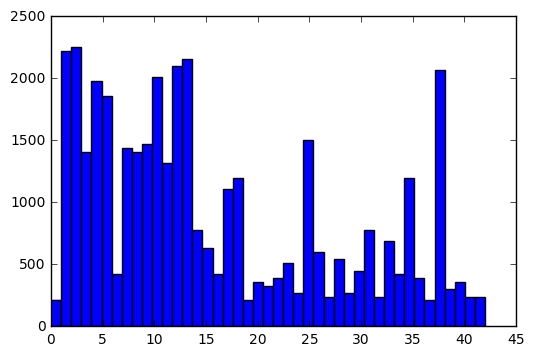

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

name = pd.read_csv('signnames.csv')
# Get a count of each traffic sign class.
train_label_counts = pd.Series(y_train, name='SampleCount').value_counts()
# Merge traffic sign class counts with class names and sort my class counts.
train_label_counts_names = name.join(train_label_counts)
#plt.figure(); train_label_counts_names['SampleCount'].plot(kind='bar')
#plt.figure(); plt.bar(train_label_counts_names.ClassId,train_label_counts_names.LabelCount)
plt.figure(); plt.hist(y_train,bins=n_classes)
train_label_counts_names

In [ ]:
np.argwhere(y_train == 1)[np.random.randint(0,10)][0]

Display random sample from each classes


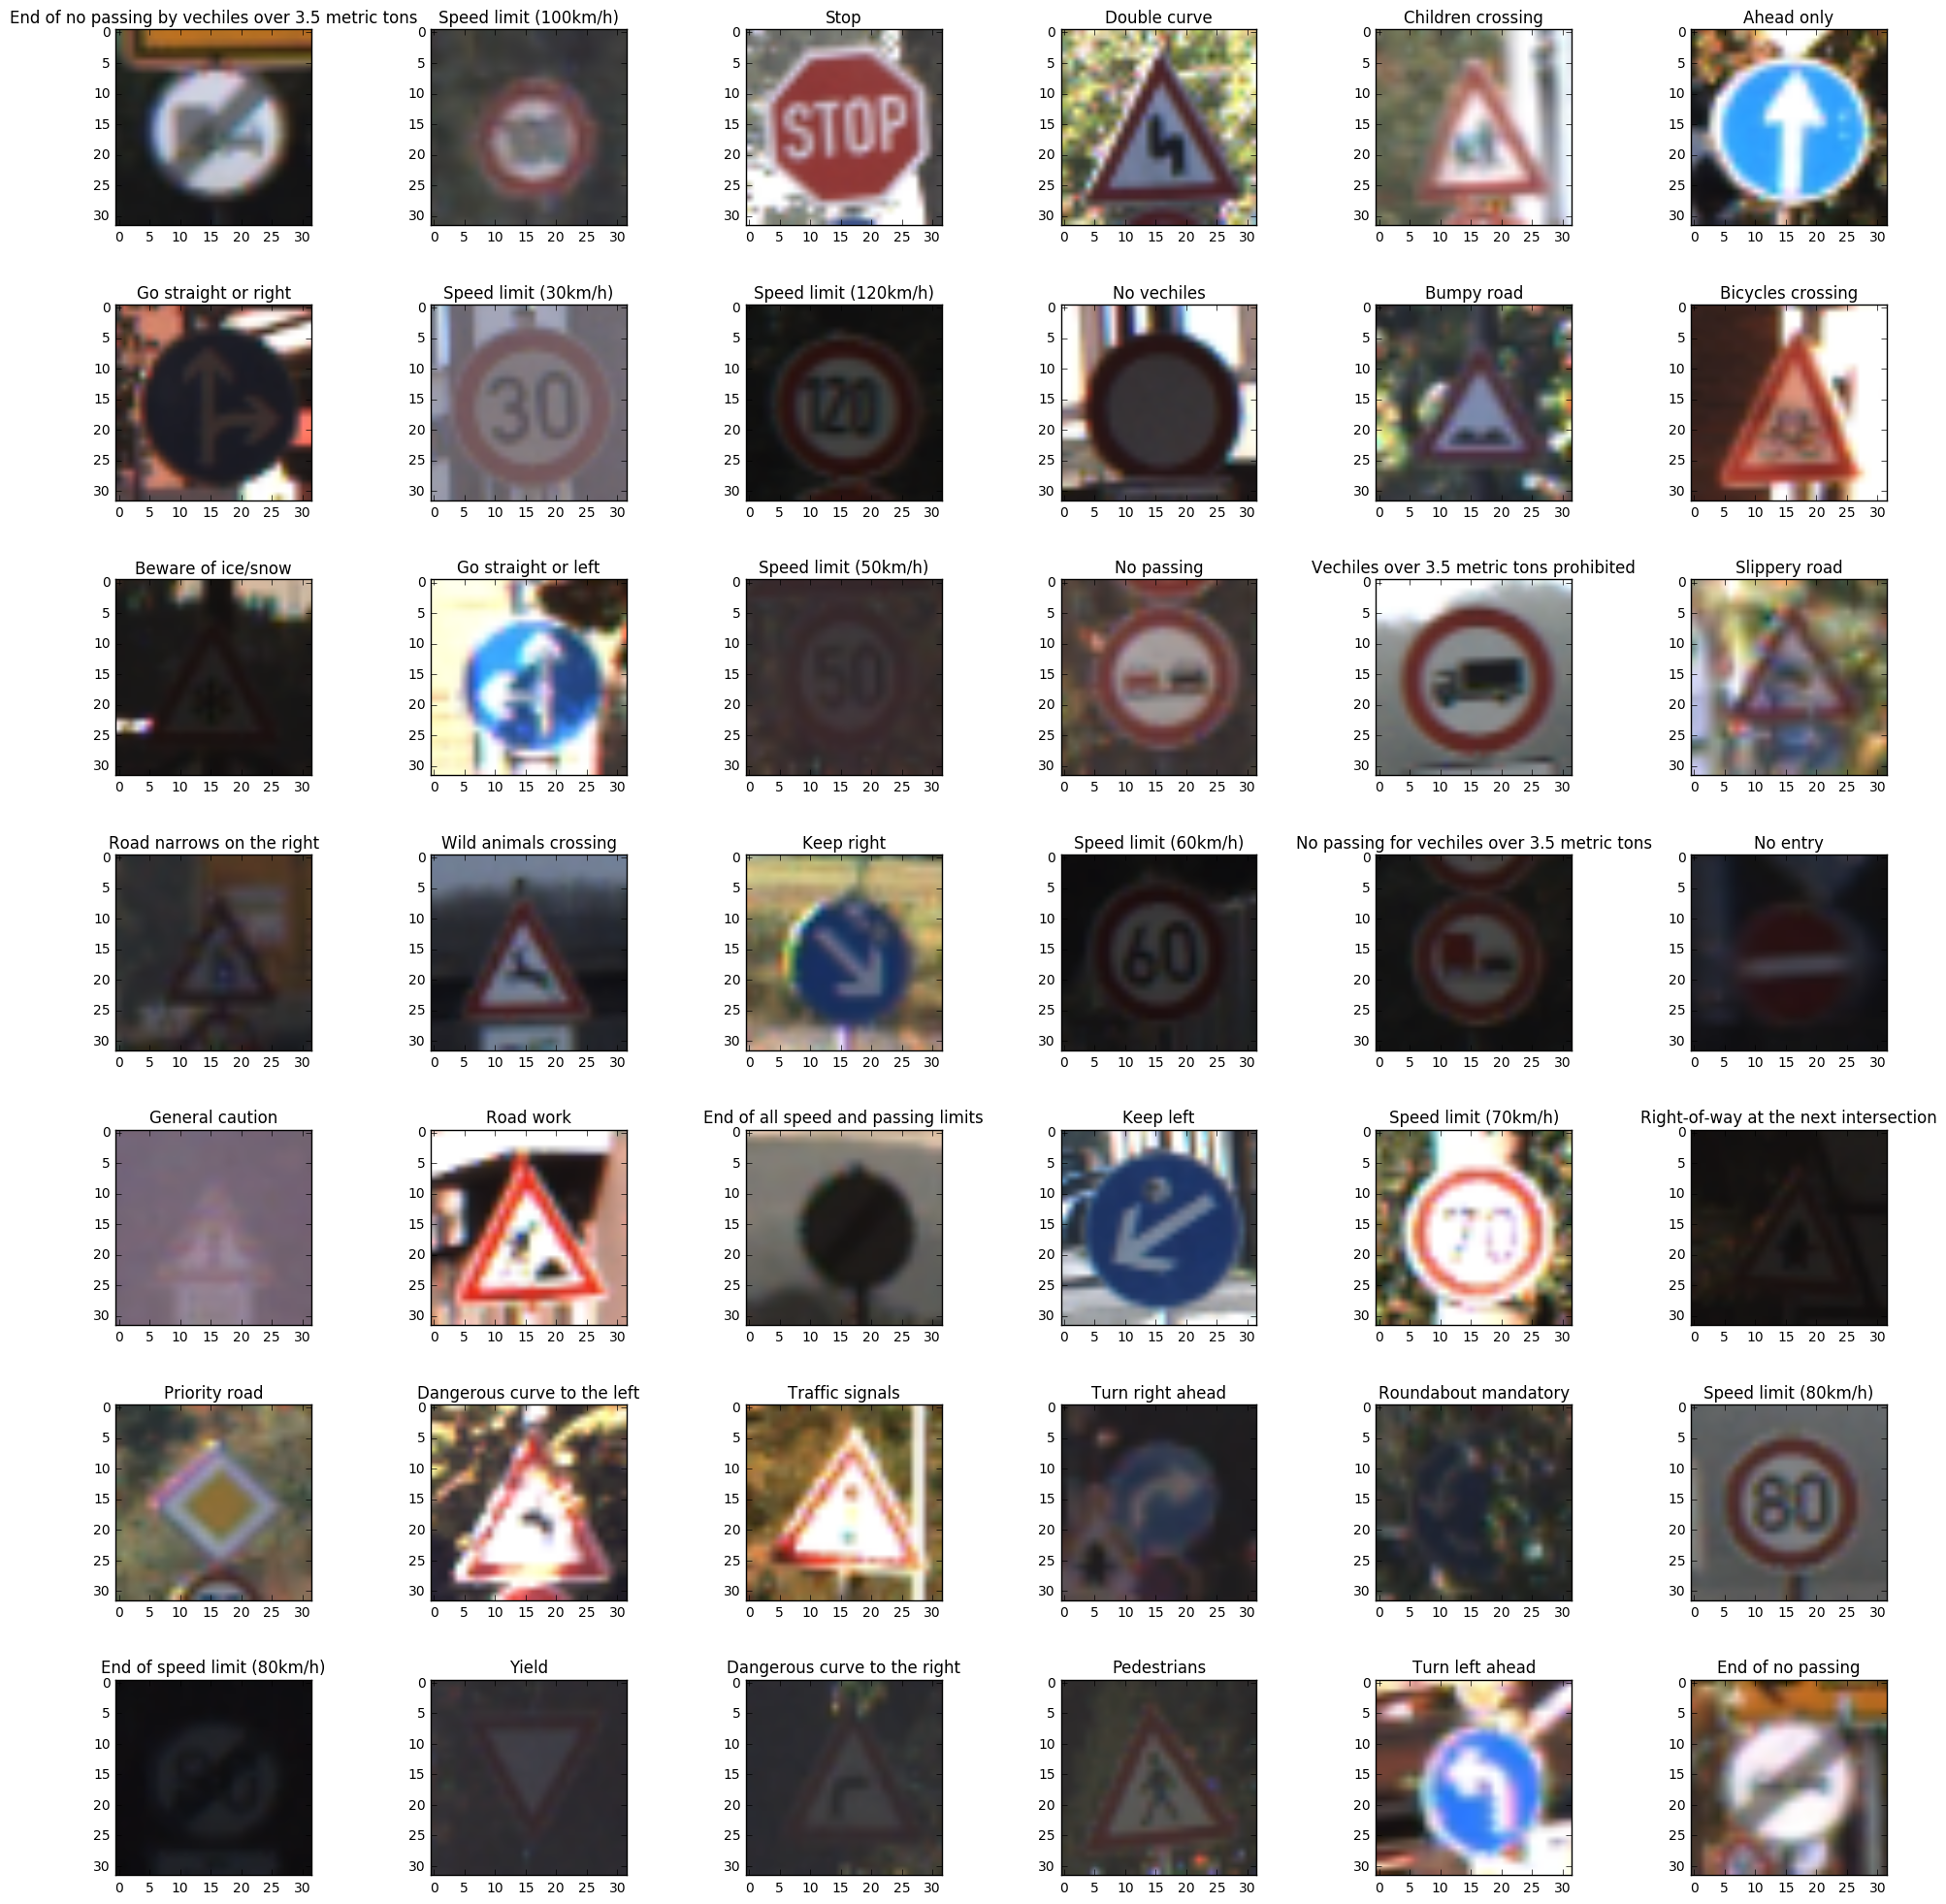

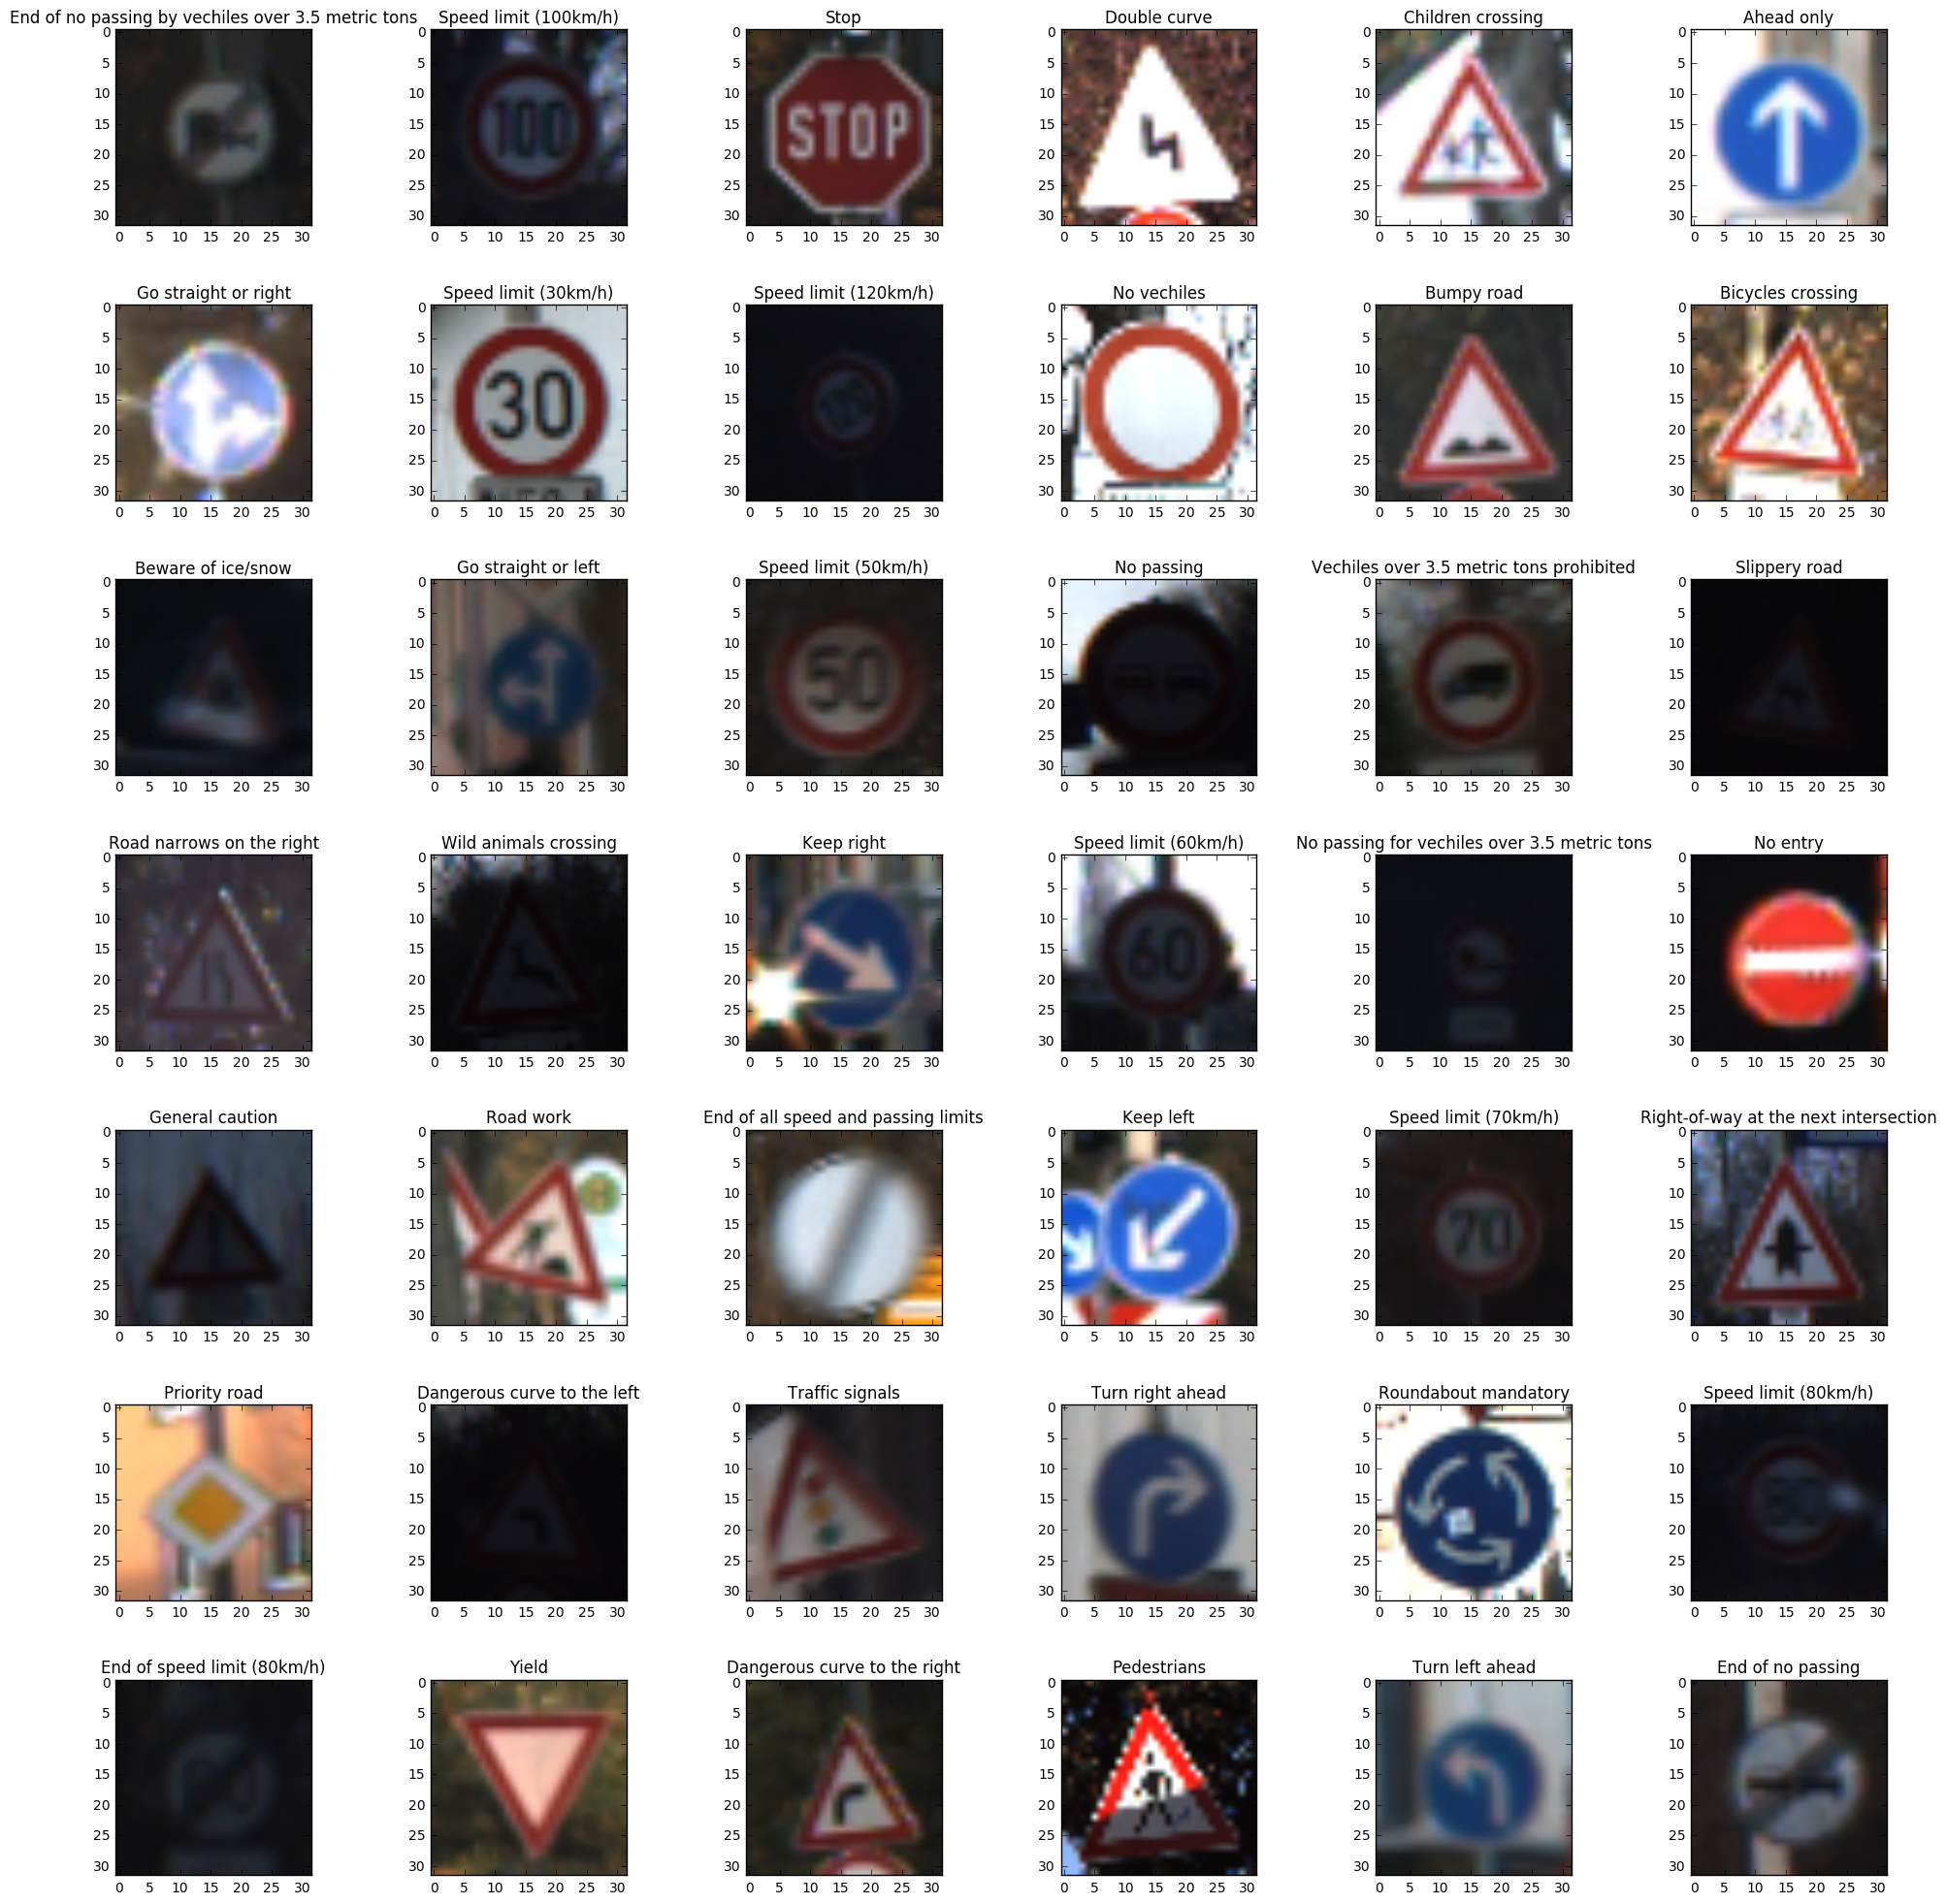

In [5]:
def display_sample_images(images,labels):
    SignNames = pd.read_csv('signnames.csv')
    _, ax = plt.subplots(7,6,figsize=(20,20))
    for ClassId, SignName in zip(SignNames.ClassId, SignNames.SignName):
        idx = np.argwhere(labels == ClassId)[np.random.randint(0, 20)][0]
        ax[ClassId % 7, ClassId % 6].imshow(images[idx])
        ax[ClassId % 7, ClassId % 6].set_title(SignName)
    plt.tight_layout()

print('Display random sample from each classes')

display_sample_images(X_train, y_train)
display_sample_images(X_test, y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
# Normalize all images so that value are between -1 to 1
import cv2
image_value_ranges = [0.1,0.9]

def convert_rgb2yuv(image_data):
    yuv_image_data = []
    for i in range(len(image_data)):
        yuv_image_data.append(cv2.cvtColor(image_data[i], cv2.COLOR_RGB2YUV))
    return np.array(yuv_image_data)

def convert_rgb2gray(image_data):
    gray_image_data = []
    for i in range(len(image_data)):
        gray_image_data.append(cv2.cvtColor(image_data[i], cv2.COLOR_RGB2GRAY))
    return np.array(gray_image_data)

def normalize_Y(image_data,sub_mean = False,use_channel=False):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # ToDo: Implement Min-Max scaling for greyscale image data
    #minV = np.amin(image_data)
    #maxV = np.amax(image_data)
    minV = 0
    maxV = 255
    lowerLimit = image_value_ranges[0]
    upperLimit = image_value_ranges[1]
    image_data = np.array(image_data,np.float32)
    image_data[:,:,:,0] =  lowerLimit + ((image_data[:,:,:,0] - minV)*(upperLimit - lowerLimit))/(maxV - minV)
    if sub_mean:
        image_data[:,:,:,0] = image_data[:,:,:,0] - np.mean(image_data[:,:,:,0], axis=0)
    if use_channel:
        return image_data
    else:
        return image_data[:,:,:,0]

def normalize_YUV(image_data, sub_mean = False):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # ToDo: Implement Min-Max scaling for greyscale image data
    #minV = np.amin(image_data)
    #maxV = np.amax(image_data)
    minV = 0
    maxV = 255
    lowerLimit = image_value_ranges[0]
    upperLimit = image_value_ranges[1]
    image_data = np.array(image_data,np.float32)
    image_data = lowerLimit + ((image_data - minV)*(upperLimit - lowerLimit))/(maxV - minV)
    if sub_mean:
        image_data -= np.mean(image_data,axis=0) 

def preprocess_images(image_data):
    # Convert rgb color format to yuv format 
    image_data_yuv = convert_rgb2yuv(image_data)
    image_data_yuv = normalize_Y(image_data_yuv,True,False)
    # Subtract the mean from channel Y
    #image_data_yuv[:,:,:,0] = image_data_yuv[:,:,:,0] - np.mean(image_data_yuv[:,:,:,0], axis=0)
    #image_data_yuv = image_data_yuv - np.mean(image_data_yuv, axis=0)
    return image_data_yuv
    
X_train_yuv = preprocess_images(X_train)
X_test_yuv = preprocess_images(X_test)

#idx = np.random.randint(n_train)
#sample_input_image = cv2.cvtColor(X_train[idx], cv2.COLOR_RGB2GRAY)
#sample_processed_image = X_train_yuv[idx][:,:,0]
#_, ax = plt.subplots(2,2)
#ax[0,0].imshow(sample_input_image, cmap='gray')
#ax[0,0].set_title('RGB Gray Image')
#ax[0,1].imshow(sample_input_image, cmap='gray')
#ax[0,1].set_title('Normalized Y Image')

#ax[1,0].set_title('RGB Gray Image Histogram')
#_= ax[1,0].hist(sample_input_image.ravel(),bins=256, color='black')
#ax[1,1].set_title('Normalized Y Image Histogram')
#_= ax[1,1].hist(sample_processed_image.ravel(),bins=256, color='black')
#plt.tight_layout()

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [ ]:
import skimage.transform as skimage_tf
import skimage.exposure as exposure

def shift_image_location(image, xoffset, yoffset):
    rows,cols, depth = image.shape
    tparam = skimage_tf.AffineTransform(translation = (xoffset,yoffset))
    out = skimage_tf.warp(image,tparam)
    assert((out.shape[0] == 32) & (out.shape[1] == 32))
    # This conversion is required as OpenCV rgb2yuv does not accept float64
    return out.astype(np.float32)
    
# function to rotate images by given degrees
def rotate_image(image, degree):
    rows, cols, depth = image.shape
    rad = (np.pi / 180) * degree
    tparam = skimage_tf.AffineTransform(rotation = rad)
    out = skimage_tf.warp(image,tparam)
    assert((out.shape[0] == 32) & (out.shape[1] == 32))
    return out.astype(np.float32)
    
# function to resize the image
def scale_image(image, ratio):
    rows, cols, depth = image.shape
    scale = skimage_tf.rescale(image,ratio)
    m_rows, m_cols, m_depth = scale.shape
    #print(ratio)
    #print(scale.shape)
    if ratio > 1.0:
        #print('GT')
        offset = m_rows - rows
        out = scale[offset:offset+rows, offset:offset+cols]
    else:
        #print('LT')
        out = np.zeros((rows,cols,depth))
        offset = rows - m_rows
        out[offset:offset+rows, offset:offset+cols] = scale
    
    assert((out.shape[0] == 32) & (out.shape[1] == 32))
    return out.astype(np.float32)

def affine_image(image, xoffset, yoffset, degree, ratio):
    out = shift_image_location(image, xoffset, yoffset)
    out = rotate_image(out, degree)
    out = scale_image(out,ratio)
    return out.astype(np.float32)

def change_intensity(image, choice):
    rows, cols, depth = image.shape
    if choice == 1:
        rnd = 2 * np.random.random()
        out = exposure.adjust_gamma(image,gamma=rnd)
    elif choice == 2:
        out = exposure.adjust_log(image)
    else:
        out = exposure.adjust_sigmoid(image)

    assert((out.shape[0] == 32) & (out.shape[1] == 32))
    return out.astype(np.float32)

def jitter_image_data(images,labels):
    num_images = images.shape[0]
    jitter_images = []
    jitter_images_labels = [] 
    for imageIdx in range(num_images):
            xoffset = int(4 * np.random.random() - 2)
            yoffset = int(4 * np.random.random() - 2)
            degree = int (30 * np.random.random() - 15)
            ratio = 0.2 * np.random.random() + 0.9
            choice = np.random.randint(4)
            # Add original image to the jitter data
            jitter_images.append(images[imageIdx])
            jitter_images_labels.append(labels[imageIdx])
            # Shift image
            jitter_images.append(shift_image_location(images[imageIdx], xoffset, yoffset))
            jitter_images_labels.append(labels[imageIdx])
            # Rotate image
            jitter_images.append(rotate_image(images[imageIdx], degree))
            jitter_images_labels.append(labels[imageIdx])
            # Scale image
            jitter_images.append(scale_image(images[imageIdx], ratio))
            jitter_images_labels.append(labels[imageIdx])
            # Affine
            jitter_images.append(affine_image(images[imageIdx], xoffset, yoffset, degree, ratio))
            jitter_images_labels.append(labels[imageIdx])
            # Brightness
            jitter_images.append(change_intensity(images[imageIdx], choice))
            jitter_images_labels.append(labels[imageIdx])
    
    return preprocess_images(np.array(jitter_images)), np.array(jitter_images_labels)

# Testing
#samples = X_train[1:10] 
#slabels = y_train[1:10]
#out1, out2 = jitter_image_data(samples,slabels)

#images_train, y_labels = jitter_image_data(X_train, y_train)
images_train = preprocess_images(X_train)
test_features = preprocess_images(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

print('Labels One-Hot Encoded')


In [ ]:
# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    images_train,
    train_labels,
    test_size=0.05,
    random_state=832289)

print('Training features and labels randomized and split.')
print('Number of training images {}'.format(train_features.shape[0]))
print('Number of validation images {}'.format(valid_features.shape[0]))

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [ ]:
# set up tensorflow
import tensorflow as tf

# define our new weighs and bias variables functions.
# we need to initialize the weights with a small amount of noise for symmetry
# breaking, and to prevent 0 gradients.
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

# Since we are using ReLU neurons, it is also good practice to initialize them
# with a slightly positive initial bias to avoid "dead neurons".
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

# define our conv2d and max_pool functions
# vanilla version conv2d - stride of one and zero padded
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# plain old max pooling over 2x2 blocks
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# first convolution layer: our vanilla conv2d followed by max_pooling.
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# we will reshape our image from 32x32 to a 4d tensor, with the second and
# third dimensions corresponding to the image width and height and the final
# dimension corresponding to the number of color channel - 1 in our case.
x = tf.placeholder(tf.float32, [None, 32, 32])
x_image = tf.reshape(x, [-1,32,32,1])

# we then convolute x_image with the weight tensor and add the bias, our good old:
#    y = Wx + b
# apply the ReLU function then follow that by sending the result into our
# max_pooling over 2x2 blocks
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# we then stack another convolution layer on top of this with 64 features
# for each 5 x 5 patch.
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

# again we convolute the max pooling over 2x2 block result from the previous
# layer with the layer 2 weight tensor and layer 2 bias, another version of our
# good old:
#    y = Wx + b
# apply the ReLU function then follow that by sending the result into another
# max_pooling over 2x2 blocks
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# we then send this into a densely (fully) connected network
# Our image is now just 8 x 8 of 64 features each.  We will send them into a
# fully connected layer with 1024 neurons to allow processing on the entire image.
W_fc1 = weight_variable([8*8*64, 1024])
b_fc1 = bias_variable([1024])

# We will reshape the tensor from the pooling layer into a batch of ventors,
# multiply by weight matrix, add bias and apply ReLU as before.
h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# We will add dropout function into the model to reduce overfitting by dropping
# out partial predictions that do not meet our threshold during training.
# This will allow us to turn it back on during testing so as to ensure we are
# predicting properly.
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Finally our fully connected layer will be terminated to another fully connected
# layer of 1024 softmax regression functions.
W_fc2 = weight_variable([1024, 43])
b_fc2 = bias_variable([43])

# good old y = Wx + b again
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 43])

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

# Define test model prediction and accuracy functions
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Model Definition Successful')

In [ ]:
# Feed dicts for training, validation, and test session
valid_feed_dict = {x: valid_features, y_ : valid_labels, keep_prob: 0.5}
test_feed_dict = {x: test_features, y_ : test_labels, keep_prob: 1}

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
# ToDo: Find the best parameters for each configuration
import tensorflow as tf
import math
epochs = 1
batch_size = 100
learning_rate = 0.1

# Create an operation that initializes all variables
init = tf.initialize_all_variables() 

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={x: batch_features, y_: batch_labels, keep_prob: 0.5})

            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                rnd_idx = np.random.randint(train_features.shape[0], size=5000)
                train_feed_dict = {x: train_features[rnd_idx], y_ : train_labels[rnd_idx], keep_prob: 1}
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()


In [ ]:
# ToDo: Set the epochs, batch_size, and learning_rate with the best parameters from problem 3
epochs = 10
batch_size = 512
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
init = tf.initialize_all_variables() 

### DON'T MODIFY ANYTHING BELOW ###
# The accuracy measured against the test set
test_accuracy = 0.0

with tf.Session() as session:
    
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
       
        # The training cycle
        for batch_i in range(batch_count):
            # Get a batch of training features and labels
            #batch_start = batch_i*batch_size
            #batch_features = train_features[batch_start:batch_start + batch_size]
            #batch_labels = train_labels[batch_start:batch_start + batch_size]
            batch_start = np.random.choice(train_features.shape[0],batch_size,replace = False)
            batch_features = train_features[batch_start]
            batch_labels = train_labels[batch_start]

            # Run optimizer
            _ = session.run(optimizer, feed_dict={x: batch_features, y_: batch_labels, keep_prob: 0.5})
                
        if epoch_i%2 == 0:
                train_accuracy = accuracy.eval(feed_dict={x:batch_features, y_: batch_labels, keep_prob: 1})
                valid_accuracy = accuracy.eval(feed_dict=valid_feed_dict)
                print("Epoch %d, training accuracy: %g  validation accuracy: %g"%(epoch_i, train_accuracy, valid_accuracy))
        
        # Check accuracy against Test data
        test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)


#assert test_accuracy >= 0.90, 'Test accuracy at {}, should be equal to or greater than 0.80'.format(test_accuracy)
print('Nice Job! Test Accuracy is {}'.format(test_accuracy))

In [ ]:
images_train, y_labels = jitter_image_data(X_train, y_train)
# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_labels)
train_labels = encoder.transform(y_labels)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
train_labels = train_labels.astype(np.float32)
# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    images_train,
    train_labels,
    test_size=0.05,
    random_state=832289)

print('Training features and labels randomized and split.')
print('Number of training images {}'.format(train_features.shape[0]))
print('Number of validation images {}'.format(valid_features.shape[0]))

In [ ]:
# ToDo: Set the epochs, batch_size, and learning_rate with the best parameters from problem 3
epochs = 50
batch_size = 64
learning_rate = 0.0001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
init = tf.initialize_all_variables() 

### DON'T MODIFY ANYTHING BELOW ###
# The accuracy measured against the test set
test_accuracy = 0.0

with tf.Session() as session:
    
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
       
        # The training cycle
        for batch_i in range(batch_count):
            # Get a batch of training features and labels
            #batch_start = batch_i*batch_size
            #batch_features = train_features[batch_start:batch_start + batch_size]
            #batch_labels = train_labels[batch_start:batch_start + batch_size]
            batch_start = np.random.choice(train_features.shape[0],batch_size,replace = False)
            batch_features = train_features[batch_start]
            batch_labels = train_labels[batch_start]

            # Run optimizer
            _ = session.run(optimizer, feed_dict={x: batch_features, y_: batch_labels, keep_prob: 0.5})
                
        if epoch_i%2 == 0:
            train_accuracy = accuracy.eval(feed_dict={x:batch_features, y_: batch_labels, keep_prob: 1})
            valid_accuracy = accuracy.eval(feed_dict=valid_feed_dict)
            print("Epoch %d, training accuracy: %g  validation accuracy: %g"%(epoch_i, train_accuracy, valid_accuracy))
        
        # Check accuracy against Test data
        test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)


#assert test_accuracy >= 0.90, 'Test accuracy at {}, should be equal to or greater than 0.80'.format(test_accuracy)
print('Nice Job! Test Accuracy is {}'.format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.